In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("travel_insurance.csv")
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.shape

(1987, 9)

## DATA WRANGLING


In [4]:
#checking whether columns are of correct data types or not?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [5]:
#checking for null values
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [7]:
#bining Income column for grouped analysis
bins = np.linspace(min(df["AnnualIncome"]), max(df["AnnualIncome"]), 4)
bins


array([ 300000.,  800000., 1300000., 1800000.])

In [8]:
#So here annual income ranges from 3lakhs to 18 lakhs
bins_names=['Low','Medium','High']
df['AnnualIncome_binned'] = pd.cut(df['AnnualIncome'], bins, labels=bins_names, include_lowest=True )
df.head(15)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_binned
0,31,Government Sector,Yes,400000,6,1,No,No,0,Low
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Medium
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,Low
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,Low
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,Low
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0,Medium
6,31,Government Sector,Yes,1300000,4,0,No,No,0,Medium
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1,High
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1,High
9,33,Government Sector,Yes,800000,3,0,Yes,No,0,Low


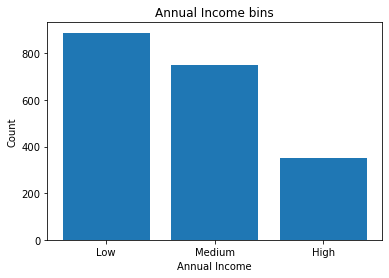

In [62]:

%matplotlib inline

plt.bar(bins_names,df["AnnualIncome_binned"].value_counts())
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.title("Annual Income bins")


plt.show()

Text(0.5, 1.0, 'Annual Income bins')

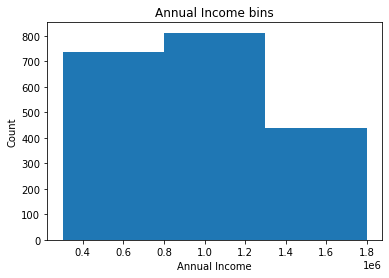

In [10]:
#Histogram to visualize distribution of bins
plt.hist(df['AnnualIncome'],bins=3)
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.title("Annual Income bins")

In [47]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [11]:
df.corr()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


In [12]:
df.describe(include='all')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_binned
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000,1987
unique,NaN,2,2,NaN,NaN,NaN,2,2,NaN,3
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN,Low
freq,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN,888
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323,NaN
std,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332,NaN
min,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000,NaN
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000,NaN
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000,NaN
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000,NaN


In [13]:
Flyer_counts=df['FrequentFlyer'].value_counts().to_frame()
Flyer_counts

,FrequentFlyer
No,1570
Yes,417


In [14]:
Travel_counts=df['EverTravelledAbroad'].value_counts().to_frame()
Travel_counts

,EverTravelledAbroad
No,1607
Yes,380


In [16]:
!pip install -U pandasql

In [17]:
from pandasql import sqldf


In [18]:
#counting the no of people who visist frequently but has not taken insurance
query=  ''' select count(*) from df where FrequentFlyer='Yes' and TravelInsurance=0 '''
sqldf(query)


,count(*)
0,178


Means among 417 frequent flyers 178 flyers have not taken insurance and 239 have insurance

In [19]:
#counting the people who dont have insurance but  travelled abroad 
query='''
select count(*) from df where EverTravelledAbroad='Yes' and TravelInsurance=0 
'''
sqldf(query)

,count(*)
0,82


Among 380 Abroad Travelers 82 dont have insurance

In [20]:
#Lets see who are frequent travelers and had travelled abroad but didnot take insurance
query='''
select count(*) from df where FrequentFlyer='Yes' and EverTravelledAbroad='Yes' and TravelInsurance=0  
'''
sqldf(query)

,count(*)
0,20


In [48]:
query='''
select count(*) from df where FrequentFlyer='No' and EverTravelledAbroad='No' and TravelInsurance=0  
'''
sqldf(query)

,count(*)
0,1037


In [21]:
#Lets see who are frequent travelers and had travelled abroad and also took insurance
query='''
select count(*) from df where FrequentFlyer='Yes' and EverTravelledAbroad='Yes' and TravelInsurance=1  
'''
sqldf(query)

,count(*)
0,148


In [22]:
#People who are frequent travelers and had travelled abroad 
query='''
select count(*) from df where FrequentFlyer='Yes' and EverTravelledAbroad='Yes'   
'''
sqldf(query)

,count(*)
0,168


Hence there are 168 most important people who travel frequently and had gone abroad
In those 148 are our customers with insurance but there are 20 people with no insurance lets see who they are

In [25]:
query='''
select * from df where FrequentFlyer='Yes' and EverTravelledAbroad='Yes' and TravelInsurance=0  
'''
Target1=sqldf(query)
Target1

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_binned
0,31,Government Sector,Yes,1500000,7,0,Yes,Yes,0,High
1,30,Private Sector/Self Employed,No,550000,6,0,Yes,Yes,0,Low
2,33,Private Sector/Self Employed,Yes,1400000,4,0,Yes,Yes,0,High
3,31,Private Sector/Self Employed,Yes,1250000,4,0,Yes,Yes,0,Medium
4,26,Private Sector/Self Employed,Yes,1500000,7,0,Yes,Yes,0,High
5,32,Government Sector,Yes,800000,4,0,Yes,Yes,0,Low
6,31,Private Sector/Self Employed,Yes,950000,5,0,Yes,Yes,0,Medium
7,33,Private Sector/Self Employed,Yes,1400000,5,0,Yes,Yes,0,High
8,25,Private Sector/Self Employed,No,1700000,5,1,Yes,Yes,0,High
9,25,Private Sector/Self Employed,No,600000,4,0,Yes,Yes,0,Low


In [26]:
Target1['AnnualIncome_binned'].value_counts()

High      10
Low        6
Medium     4
Name: AnnualIncome_binned, dtype: int64

In [27]:
Target1['ChronicDiseases'].value_counts()

0    16
1     4
Name: ChronicDiseases, dtype: int64

In [28]:
cd=Target1[Target1['ChronicDiseases']==1]
cd

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_binned
8,25,Private Sector/Self Employed,No,1700000,5,1,Yes,Yes,0,High
11,34,Private Sector/Self Employed,Yes,1500000,5,1,Yes,Yes,0,High
13,29,Private Sector/Self Employed,Yes,1350000,3,1,Yes,Yes,0,High
17,25,Private Sector/Self Employed,No,1350000,3,1,Yes,Yes,0,High


All the people with chronic diseases have high income and are in the age of 25-35 years with people of age 25 being not graduated..

In [46]:
no_cd=Target1[Target1['ChronicDiseases']==0]
no_cd.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_binned
0,31,Government Sector,Yes,1500000,7,0,Yes,Yes,0,High
1,30,Private Sector/Self Employed,No,550000,6,0,Yes,Yes,0,Low
2,33,Private Sector/Self Employed,Yes,1400000,4,0,Yes,Yes,0,High
3,31,Private Sector/Self Employed,Yes,1250000,4,0,Yes,Yes,0,Medium
4,26,Private Sector/Self Employed,Yes,1500000,7,0,Yes,Yes,0,High


****High income-6people ; Medium Income-4 ; low-6 with people in range of 25-34 age and most of them have more than 3 dependent family members

In [30]:
#Lets see people being either Frequent Traveller or abroad traveller with no insurance
query='''
select * from (select * from df where TravelInsurance=0) where FrequentFlyer='Yes' or EverTravelledAbroad='Yes'
except
select * from (select * from df where TravelInsurance=0) where FrequentFlyer='Yes' and EverTravelledAbroad='Yes'
'''
Target2=sqldf(query)
Target2.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_binned
0,25,Government Sector,Yes,750000,2,0,Yes,No,0,Low
1,25,Government Sector,Yes,750000,5,1,Yes,No,0,Low
2,25,Private Sector/Self Employed,No,600000,4,0,Yes,No,0,Low
3,25,Private Sector/Self Employed,No,600000,4,1,Yes,No,0,Low
4,25,Private Sector/Self Employed,No,600000,5,0,Yes,No,0,Low


We see there are 185 people with either being a frequent traveller or abroad traveller but not both with no insurance

In [31]:
cd1=Target2[Target2['ChronicDiseases']==1]
cd1.shape

(55, 10)

In [32]:
no_cd1=Target2[Target2['ChronicDiseases']==0]
no_cd1.shape

(130, 10)

In [33]:
Target2['AnnualIncome_binned'].value_counts()

Medium    105
Low        70
High       10
Name: AnnualIncome_binned, dtype: int64

More than 60% people are of high or medimum level income

In [64]:
query='''
select * from (select * from Target2 where ChronicDiseases=0) where AnnualIncome_binned in ('High','Medium')
'''
Target2_1=sqldf(query)
Target2_1.shape

(77, 10)

In [35]:
Target2_1['Employment Type'].value_counts()

Private Sector/Self Employed    60
Government Sector               17
Name: Employment Type, dtype: int64

In [36]:
Target2_1['GraduateOrNot'].value_counts()

Yes    69
No      8
Name: GraduateOrNot, dtype: int64

In [65]:
Target2_1_2=Target2_1.loc[(Target2_1['FamilyMembers']>3)]
Target2_1_2.shape

(56, 10)

In [37]:
# lets find people of private sector/self employed with more than 3 family memebers
Target2_2=Target2_1.loc[(Target2_1['Employment Type']=='Private Sector/Self Employed') & (Target2_1['FamilyMembers']>3)]
Target2_2.shape

(45, 10)

All of them are in the age of 25-35 years

## DATA VISUALIZATION


In [38]:
#visualize count of people  grouped by familymemebers
df_bar=df[['FamilyMembers']].value_counts().to_frame()
df_bar.rename(columns={0:'count'},inplace=True)
df_bar_sorted=df_bar.sort_values(by=['FamilyMembers'])


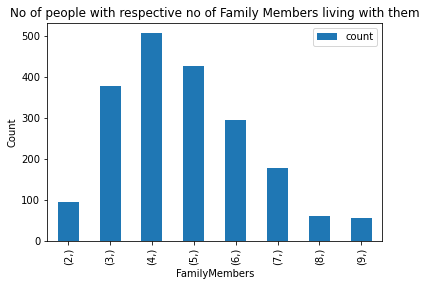

In [39]:
df_bar_sorted.plot.bar()
plt.xlabel('FamilyMembers')
plt.ylabel('Count')
plt.title('No of people with respective no of Family Members living with them')
plt.show()

In [40]:
df_bar1=cd[['FamilyMembers']].value_counts().to_frame()
df_bar1.rename(columns={0:'count'},inplace=True)
df_bar1_sorted=df_bar1.sort_values(by=['FamilyMembers'])

df_bar2=no_cd[['FamilyMembers']].value_counts().to_frame()
df_bar2.rename(columns={0:'count'},inplace=True)
df_bar2_sorted=df_bar2.sort_values(by=['FamilyMembers'])


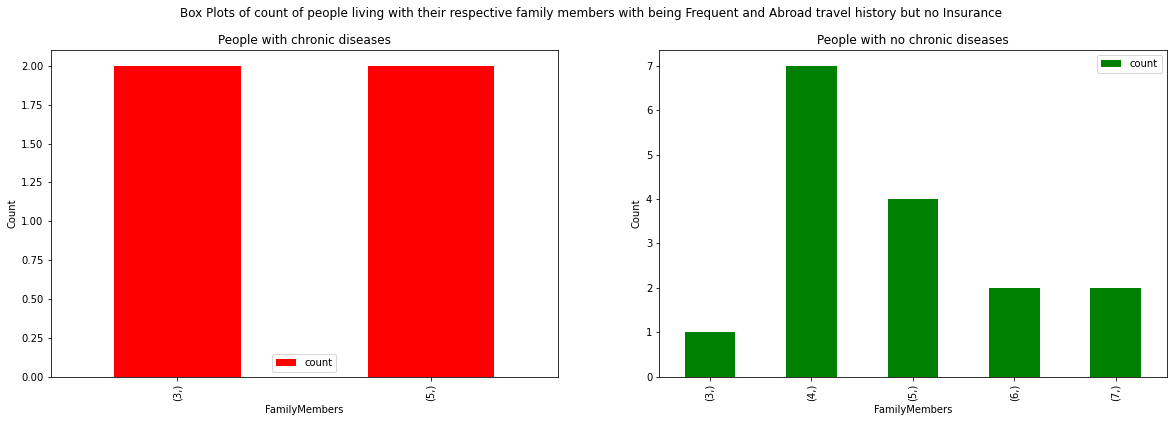

In [41]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) 
ax1 = fig.add_subplot(122) 

plt.suptitle('Box Plots of count of people living with their respective family members with being Frequent and Abroad travel history but no Insurance')

df_bar1_sorted.plot(kind='bar',color='red',figsize=(20, 6),ax=ax0)
ax0.set_title('People with chronic diseases')
ax0.set_xlabel('FamilyMembers')
ax0.set_ylabel('Count')

df_bar2_sorted.plot(kind='bar',color='green',figsize=(20, 6),ax=ax1)
ax1.set_title ('People with no chronic diseases')
ax1.set_ylabel('Count')
ax1.set_xlabel('FamilyMembers')


plt.show()

In [42]:
df_bar3=cd1[['FamilyMembers']].value_counts().to_frame()
df_bar3.rename(columns={0:'count'},inplace=True)
df_bar3_sorted=df_bar3.sort_values(by=['FamilyMembers'])

df_bar4=no_cd1[['FamilyMembers']].value_counts().to_frame()
df_bar4.rename(columns={0:'count'},inplace=True)
df_bar4_sorted=df_bar4.sort_values(by=['FamilyMembers'])

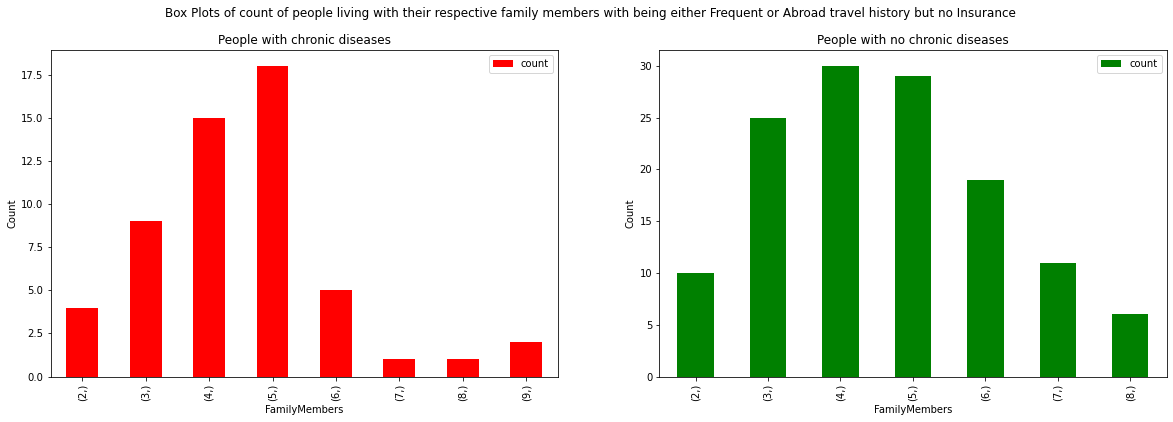

In [43]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) 
ax1 = fig.add_subplot(122) 

plt.suptitle('Box Plots of count of people living with their respective family members with being either Frequent or Abroad travel history but no Insurance')

df_bar3_sorted.plot(kind='bar',color='red',figsize=(20, 6),ax=ax0)
ax0.set_title('People with chronic diseases')
ax0.set_xlabel('FamilyMembers')
ax0.set_ylabel('Count')

df_bar4_sorted.plot(kind='bar',color='green',figsize=(20, 6),ax=ax1)
ax1.set_title ('People with no chronic diseases')
ax1.set_ylabel('Count')
ax1.set_xlabel('FamilyMembers')


plt.show()

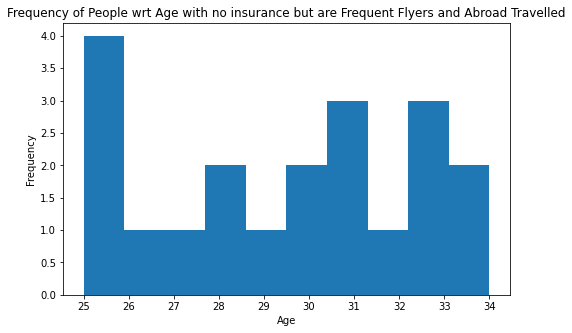

In [44]:
#Histograms to see age frequency distribution of people with no travel insurance

count, bin_edges = np.histogram(Target1['Age'],9)

Target1['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Frequency of People wrt Age with no insurance but are Frequent Flyers and Abroad Travelled') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Age') # add x-label

plt.show()

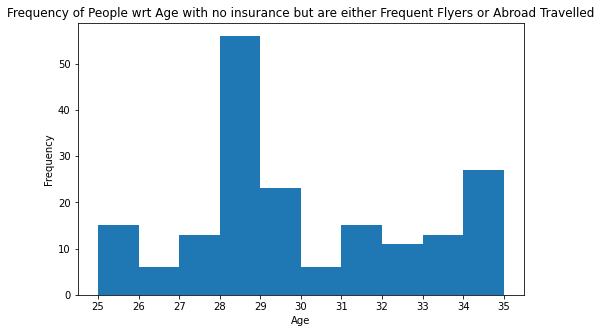

In [45]:
count, bin_edges = np.histogram(Target2['Age'],10)

Target2['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Frequency of People wrt Age with no insurance but are either Frequent Flyers or Abroad Travelled') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Age') # add x-label

plt.show()